In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation, discrepancies_intervals

RANDOM_STATE = 42

import matplotlib.pyplot as plt
%matplotlib inline

/home/ubuntu/miniconda3/envs/py39/lib/python3.9/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [2]:
# Get data and fit a pool of classifiers on it

X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(n_samples=1000, noise=0.3)
#X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(dataset='breast-cancer')

pool1 = pool.AutoSklearnPool(max_delta_accuracies=0.05, time_left_for_this_task=30, n_jobs=14)
pool1 = pool1.fit(X_train, y_train)

In [3]:
p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=50)
p2g.fit(max_epochs=10)

p2g.G.nodes(data=True)[-1]

{'pool_predictions': autosklearn#1    1
 autosklearn#2    1
 autosklearn#3    1
 Name: 0, dtype: int32,
 'features': 0   -0.389789
 1   -0.407370
 Name: -1, dtype: float64,
 'discrepancies': 0,
 'y_true': None,
 'ground_truth': False,
 'Xtrain_index': -1}

## TEST of discrepancies intervals machinery on a dumb example

In [5]:
path = [2,-119,-281,-164,-282,-83,-283,-163,-280,-120,-279,-165,-284,214.0]

discrepancies = discrepancies_intervals.get_path_discrepancies(path, p2g.G)
print(path)
print(discrepancies)

for d in np.unique(discrepancies):
    if d>0:
        discrepancies_mask = discrepancies==d
        di = discrepancies_intervals.DiscrepancyInterval((path[0],path[-1]), discrepancies_mask, path, p2g.G)
        
        print(f'Discrepancies interval mask: {di.discrepancies_interval_mask}')
        print(f'Discrepancies interval borders: {di.border_discrepancies}')
        print(f'Discrepancies interval border features: {di.border_features}')

x = X_train.loc[23]
di.get_min_dist_to_point(x)

[2, -119, -281, -164, -282, -83, -283, -163, -280, -120, -279, -165, -284, 214.0]
[0 0 1 1 1 1 1 0 0 0 2 2 0 3]
Discrepancies interval mask: [False False  True  True  True  True  True False False False False False
 False False]
Discrepancies interval borders: [False, True, False, False, False, False, False, True, False, False, False, False, False, False]
Discrepancies interval border features:              0         1
-119  0.173618 -0.849725
-163  0.552601  0.832770
Discrepancies interval mask: [False False False False False False False False False False  True  True
 False False]
Discrepancies interval borders: [False, False, False, False, False, False, False, False, False, True, False, False, True, False]
Discrepancies interval border features:              0         1
-120  0.609823  0.685563
-284  0.058445 -0.118430
Discrepancies interval mask: [False False False False False False False False False False False False
 False  True]
Discrepancies interval borders: [False, False, False

2.0747192743993383

## Get all discrepancies interval for the case

In [6]:
intervals = discrepancies_intervals.get_discrepancies_intervals(p2g.G)

## Plot discrepancies interval for an arbitrary point

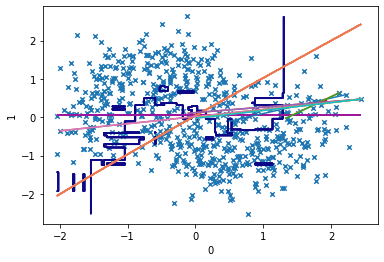

In [7]:
x = X_test.loc[[200]]
k = 10

dists = []
for di in intervals:
    dists.append( di.get_min_dist_to_point(x) )

ax = plt.subplot()
p2g.plot_db()

X_train.plot(kind='scatter', x=0, y=1, ax=ax, marker='x')
x.plot(kind='scatter', x=0, y=1, ax=ax, c='r')

for di in np.array(intervals)[np.argsort(dists)][:k]:
    #print(di.border_features)
    #print(di.border_bounds_discrepancies)

    plt.plot(di.border_features.iloc[:,0], di.border_features.iloc[:,1])


In [70]:
di.border_features

,0,1
210,1.806755,0.425227
507,1.623922,0.051792
